# Modele generatywne; sieci kodujące-dekodujące

## Sieci kodujące-dekodujące

Jak wiemy z poprzednich zajęć sieci neuronowe pozwalają nam efektywnie zredukować wymiar wejściowego zbioru danych, zazwyczaj w celu odpowiedniej klasyfikacji i predykcji na zadanym zbiorze. Co jednak jeśli jesteśmy zainteresowani tylko redukcją wymiaru danych a nie wnioskowaniem na ich podstawie?

Klasyczna sieć kodująca-dekodująca (<b>autoencoder</b>) pozwala nam na zakodowanie danych (najczęściej obrazu) w formie wektora <b>zmiennych ukrytych</b> <i>(latent variables)</i> i następnie odtworzenie go w możliwie jak najbardziej bezstratnej formie:

[![](http://kvfrans.com/content/images/2016/08/autoenc.jpg)](http://kvfrans.com/variational-autoencoders-explained/)

Idea uczenia takiego modelu polega na zbudowaniu dwóch sieci - kodującej (<i>encoder</i>), która mapuję dane wejściowe do wektora zmiennych ukrytych $z = f(x)$ i sieci dekodującej (<i>decoder</i>), która mapuje wektor zmiennych ukrytych z powrotem na przestrzeń zmiennych wynikowych $x = g(z)$

Tego typu sieci posiadają wiele zastosowań, między innymi:

- Są efektywnym narzędziem kompresji.
- Można je stosować jako sposób szyfrowania danych.
- Umożliwiają odszumienie danych.
- Pozwalają na wykrycie nietrywialnych zależności między danymi, które nie są możliwe do uzyskania za pomocą klasycznych algorytmów uczenia nienadzorowanego.
- Pozwalają na osadzenie złożonych danych w znacznie mniejszej przestrzeni przy niewielkiej stracie informacji.
- Pozwalają na generowanie nowych danych.


Sposób uczenia takiej sieci jest relatywnie prosty - minimalizujemy funkcję straty $L(x,g(f(x)))$. Taki model możemy też regularyzować (np. w celu zapewnienia niskiej wymiarowości embeddingu lub odpowiedniego rozmieszczenia danych w przestrzeni):

$$L(x,g(f(x))) + \Omega(z)$$

W takim wypadku autoenkoder możemy traktować jako formę modelu generatywnego,w którym aproksymujemy estymator największej wiarygodności (<i>Maximum Likelihood Estimation</i>, MLE) bazując na zmiennych ukrytych $z$. Znając $z$ i dane wejściowe $x$ model możemy przedstawić jako:
$$p_{model}(x,z) = p_{model}(z)p_{model}(x|z)$$
gdzie $p_{model}(z)$ to z góry założony rozkład zmiennych ukrytych.

W takim wypadku możemy przedstawić dekoder jako:

$$\log p_{model}(x) = \log \sum_z p_{model}(z)p_{model}(z,x)$$

A uczenie modelu sprowadza się do maksymalizacji wartości wyrażenia:

$$\log p_{model}(z,x) = \log p_{model}(z) + \log p_{model}(x|z)$$

Dlaczego korzystając z autoenkoderów jesteśmy w stanie efektywnie redukować wymiarowość danych?

Zgodnie z <b>hipotezą rozmaitości</b> (<i>Manifold hypothesis</i>) o kształcie  zbiorów danych o wysokim wymiarze decyduje tak naprawdę niewielka liczba zmiennych:

[![](https://www.researchgate.net/profile/Y_Bengio/publication/221700451/figure/fig1/AS:305523212734474@1449853818623/Example-of-a-simple-manifold-in-the-space-of-images-associated-with-a-rather-low-level.png)](https://www.researchgate.net/figure/Example-of-a-simple-manifold-in-the-space-of-images-associated-with-a-rather-low-level_fig1_221700451/)



Pokażmy prosty przykład:

In [1]:
using Flux, Flux.Data.MNIST
using Flux: mse, throttle, params, Statistics, @epochs
using Base.Iterators: partition
using Printf, BSON, LinearAlgebra
using Flux.Losses

In [2]:
X = float.(hcat(vec.(MNIST.images())...))
N, M = size(X, 2), 64
data = [X[:,i] for i in Iterators.partition(1:N,M)];

In [6]:
using Images

In [14]:
encoder = Chain(Dense(28^2, 256, leakyrelu),
                Dense(256, 32, leakyrelu))
    
decoder = Chain(Dense(32, 256, leakyrelu), 
                Dense(256, 28^2))

Chain(Dense(32, 256, leakyrelu), Dense(256, 784))

In [15]:
model = Chain(encoder, decoder)
loss(x) = mse(model(x), x)
evalcb = throttle(() -> @show(loss(data[1])), 100)
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

In [16]:
img(x::Vector) = Gray.(reshape(clamp.(x, 0, 1), 28, 28))

function sample()
  before = [MNIST.images()[i] for i in rand(1:length(MNIST.images()), 4)]
  after = img.(map(x -> model(float(vec(x))), before))
  vcat(hcat.(before, after)...)
end

sample (generic function with 1 method)

┌ Info: Beginning training loop...
└ @ Main In[17]:1


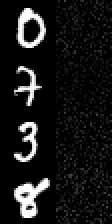

loss(data[1]) = 0.1066991757170739


┌ Info: Epoch 1
└ @ Main In[17]:5


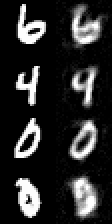

loss(data[1]) = 0.020076465190249092

┌ Info: Epoch 2
└ @ Main In[17]:5


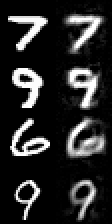

┌ Info: Epoch 3
└ @ Main In[17]:5


loss(data[1]) = 0.015254177822005187


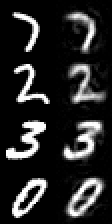

┌ Info: Epoch 4
└ @ Main In[17]:5


loss(data[1]) = 0.014143411356007947


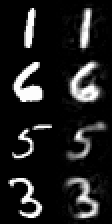

┌ Info: Epoch 5
└ @ Main In[17]:5


loss(data[1]) = 0.012985791313506004


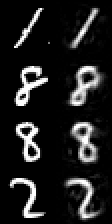

┌ Info: Epoch 6
└ @ Main In[17]:5


loss(data[1]) = 0.012405299692250932


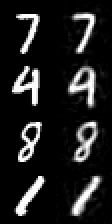

┌ Info: Epoch 7
└ @ Main In[17]:5


loss(data[1]) = 0.011842590657734504


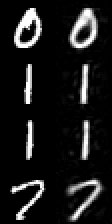

┌ Info: Epoch 8
└ @ Main In[17]:5


loss(data[1]) = 0.01142202967697338


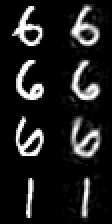

┌ Info: Epoch 9
└ @ Main In[17]:5


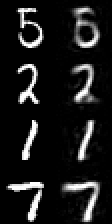

┌ Info: Epoch 10
└ @ Main In[17]:5


loss(data[1]) = 0.010739940143846877


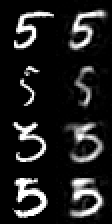

┌ Info: Epoch 11
└ @ Main In[17]:5


loss(data[1]) = 0.01044745805901756


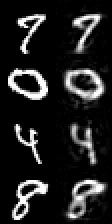

┌ Info: Epoch 12
└ @ Main In[17]:5


loss(data[1]) = 0.010099037555826508


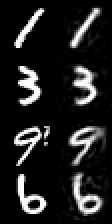

┌ Info: Epoch 13
└ @ Main In[17]:5


loss(data[1]) = 0.009985526749790162


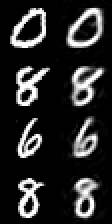

┌ Info: Epoch 14
└ @ Main In[17]:5


loss(data[1]) = 0.009850981976148712


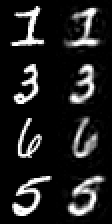

┌ Info: Epoch 15
└ @ Main In[17]:5


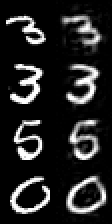

┌ Info: Epoch 16
└ @ Main In[17]:5


loss(data[1]) = 0.009565381938873248


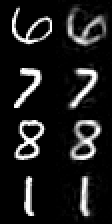

┌ Info: Epoch 17
└ @ Main In[17]:5


loss(data[1]) = 0.009356618558844123


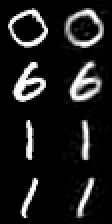

┌ Info: Epoch 18
└ @ Main In[17]:5


loss(data[1]) = 0.009240739655027906


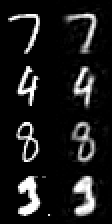

┌ Info: Epoch 19
└ @ Main In[17]:5


loss(data[1]) = 0.009485359796036498


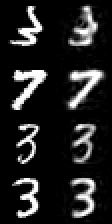

┌ Info: Epoch 20
└ @ Main In[17]:5


loss(data[1]) = 0.009049342106285661


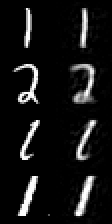

┌ Info: Epoch 21
└ @ Main In[17]:5


loss(data[1]) = 0.009046737627143487


┌ Warning:  -> We're calling this converged.
└ @ Main In[17]:16


In [17]:
@info("Beginning training loop...")
best_ls = Inf
last_improvement = 0
for epoch = 1:30
    @info "Epoch $epoch"
    display(sample())
    global best_ls, last_improvement
    Flux.train!(loss, params(model), zip(data), opt, cb = evalcb)
    ls = loss(data[1])
    if ls <= best_ls
        BSON.@save "enc_dec.bson" model epoch
        best_ls = ls
        last_improvement = epoch
    end
    if epoch - last_improvement >= 2
        @warn(" -> We're calling this converged.")
        break
    end
end

In [18]:
BSON.@load "enc_dec.bson" model 

In [19]:
encoder(float(vec(MNIST.images()[1])))

32-element Array{Float32,1}:
  2.1636705
  1.4437879
  1.4420936
  0.65787494
  1.0990332
 -0.4741965
  0.98627245
  2.2061431
  1.1517941
  0.8293165
 -0.67992294
  1.9561725
  2.779326
  ⋮
  1.3876715
 -0.48773715
  1.9024146
  1.1336586
  1.3835446
 -0.38956344
 -0.2737544
 -0.0011798246
  2.0478828
 -0.2293864
 -0.5282682
  2.450699

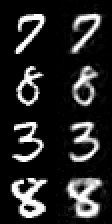

In [21]:
sample()

Taki model pozwala na całkiem efektywną kompresję wejściowych danych. Jednak co należy zrobić gdy chcielibyśmy generować nowe obrazy na podstawie danych wejściowych a nie jedynie je odtwarzać?


##  Wariacyjne autoenkodery

[Variational Autoencoder](https://arxiv.org/pdf/1312.6114.pdf) jest klasą modeli, która na to pozwala. Intuicja  za nimi stojąca jest prosta, sieć dekodująca zamiast odtwarzać obraz w skali 1:1 dodaje do nich pewną losowość, dzięki której wyjściowy obraz jest nieznacznie zmieniony w stosunku do obrazu wejściowego.

Otrzymanie tej losowości jest możliwe dzięki wygenerowaniu przez sieć kodującą nie tyle wektora zmiennych ukrytych, co wektora średnich i odchyleń standardowych zmiennych ukrytych z których następnie losowane są zmienne ukryte wykorzystane przez sieć dekodującą:

[![](http://kvfrans.com/content/images/2016/08/vae.jpg)](http://kvfrans.com/variational-autoencoders-explained/)

Jak działa taka sieć?

Tym co chcemy znaleźć jest rozkład prawdopodobieństwa $p(x,z)$, który wyjaśnia to w jaki sposób zmienne ukryte kształtują dane:

$$p(x,z) = p(x|z)p(z)$$

Po uzyskaniu takiej informacji jesteśmy w stanie efektywnie generować nowe obserwacje:
1. Najpierw poprzez wygenerowanie zmiennych ukrytych z odpowiedniego rozkładu $z_i  \sim p(z)$
2. A następnie nowej obserwacji $x_i \sim p(x|z)$

[![](https://i.stack.imgur.com/w0HP5.png)](https://arxiv.org/pdf/1312.6114.pdf)



Aby wyniki były satysfakcjonujące musimy zbudować model, który będzie umiał efektywnie reprezentować rzeczywiste dane $x$ za pomocą zmiennych ukrytych $z$: 

$$p(z|x) = \frac{p(x|z)p(z)}{p(x)}$$

Problematyczne jest wyznaczenie wartości $p(x) = \int {p(x|z)p(z)}dz$

Jak to zrobić? 
- bezpośrednio?
- generując dane z rozkladu i uśredniając wyniki?


Zamiast tego mozemy wyaproksymowac $p(z|x)$ za pomocą przyjętego rozkladu $q_{\phi}(z|x)$, który należy do znanej nam rodziny rozkladów prawdopodobieństwa $\phi$. Np. gdy $\phi$ to rodzina rozkładów gaussowskich, wtedy oczywiście zmienne ukryte reprezentujące każdy punkt $x_i$ przyjmują postać: $(\mu_{x_i},\sigma_{x_i})$

Wtedy problem sprowadza się do policzenia::
$$E_{z \sim  q_{\phi}}[p(x | z)]$$ 


Jak jednak $q_{\phi}$ ma sie do $p$?


Mozemy to zmierzyc za pomoca Dywergencji Kullbacka-Leiblera:

$$d_{KL}(q_{\phi}(z|x)||p(z|x)) = E_{q_{\phi}}[\log q_{\phi}(z|x)] - E_{q_{\phi}}[\log p(x,z)] + \log p(x)$$

Za zadanie mamy znaleźć takie $q_{\phi}^*$, które zminimalizuje dywergencje:

$$q_{\phi}^* = \underset{\phi}{\operatorname{argmin}}d_{KL}(q_{\phi}(z|x)||p(z|x))$$

Niestety w wyrażeniu znów pojawia się wartość $p(x)$. Jak w takim razie policzyć stratę dla takiego modelu?

Aby to zrobić zdefiniujmy <b>Evidence Lower BOund</b> (ELBO):

$$ELBO(\phi) = E_{q_{\phi}}[\log p(x,z)] -  E_{q_{\phi}}[\log q_{\phi}(z|x)]$$

Zauważmy, że:

$$\log p(x) = ELBO(\phi) + d_{KL}(q_{\phi}(z|x)||p(z|x))$$

Na mocy nierówności Jensena Dywergencja Kullbacka-Leiblera jest zawsze nieujemna, co oznacza, że problem minimalizacji dywergencji sprowadza się do problemu maksymalizacji ELBO.

Co więcej, wariacyjny autoenkoder posiada tylko lokalne zmienne ukryte, służace do generowania pojedynczych obserwacji. Dzięki czemu możemy wyznaczyć wartość ELBO w pojedynczym punkcie i odpowiednio zagregować wartości:

$$ELBO(\theta,\psi)=\sum_{i=1}^n E_{q_{\phi}(z|x_i;\theta)}[\log p(x_i|z; \psi)] - \sum_{i=1}^n d_{KL}(q(z|x_i; \theta)||p(z))$$


W takim wypadku funkcja straty przyjmuje postać:

$$L(\theta,\psi) = -\sum_{i=1}^n E_{q_{\phi}(z|x_i;\theta)}[\log p(x_i|z; \psi)] + \sum_{i=1}^n d_{KL}(q(z|x_i; \theta)||p(z))$$


Z punktu widzenia sieci neuronowej, wariacyjny autoenkoder możemy traktować jako rodzaj regularyzowanego enkodera.
Pierwszy składnik funkcji straty $\sum_{i=1}^n E_{q_{\phi}(z|x_i;\theta)}[\log p(x_i|z; \psi)]$ możemy traktować jako błąd rekonstrukcji. Chcemy żeby nasz model umiał efektywnie mapować obserwację $x_i$ na zmienne ukryte $z_i$, a następnie odtworzyć je mozliwie najefektywniej, bez utraty jakości. 
Gdybyśmy jednak chcieli uczyć model tylko za pomocą błędu rekonstrukcji sieci byłby on w stanie efektywnie reprezentować instniejące już obserwacje (dane wejściowe), jednak nie byłby w stanie generować nowych obserwacji.

Dlatego do modelu dodajemy dywergecję Kullbacka-Leiblera jako regularyzator. Wymusza on na tak zbudowanym modelu odpowiednie pokrycie przestrzeni zmiennych ukrytych:

[![](https://www.jeremyjordan.me/content/images/2018/03/Screen-Shot-2018-03-18-at-7.22.24-PM.png)](https://www.jeremyjordan.me/variational-autoencoders/)


Dzięki tym właściwością wariacyjne autoenkodery są doskonałym narzędziem służącym do [redukcji wymiarowości i reprezentacji danych w mniejszych przestrzeniach](https://www.deeplearningbook.org/contents/generative_models.html)

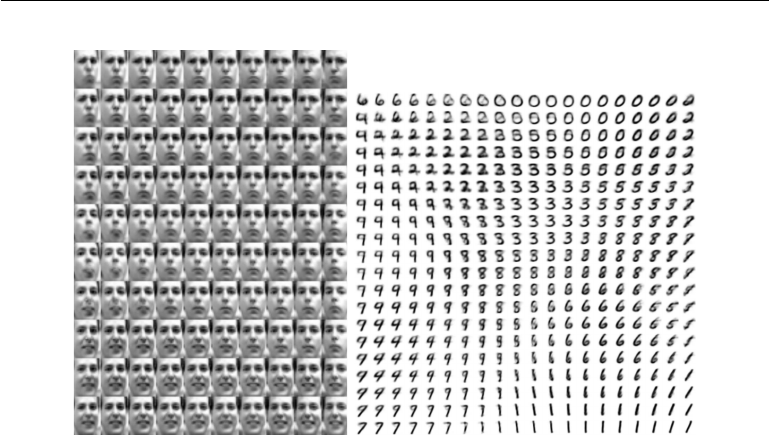

Przejdźmy do implementacji modelu:

In [2]:
X = float.(hcat(vec.(MNIST.images())...)) .> 0.5
N, M = size(X, 2), 64
data = [Float32.(X[:,i]) for i in Iterators.partition(1:N,M)];

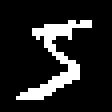

In [8]:
img(Float64.(X[:,1]))

Zdefiniujmy model:

In [36]:
Dz, Dh = 32, 256 #wymiary

(32, 256)

In [37]:
encoder = Dense(28^2, Dh, leakyrelu)
    
μ = Dense(Dh, Dz)
logσ = Dense(Dh, Dz)
z(μ, logσ) = μ + exp.(logσ) .* randn(Float32,size(logσ))

decoder = Chain(Dense(Dz, Dh, leakyrelu),
                Dense(256, 28^2))


Chain(Dense(32, 256, leakyrelu), Dense(256, 784))

I funkcję straty:

In [15]:
# KL-divergence between approximation posterior and N(0, 1) prior
kl_q_p(μ, logσ) = 0.5f0 * sum(@. (exp(2f0 * logσ) + μ^2 -1f0 - 2f0 * logσ))

kl_q_p (generic function with 1 method)

In [16]:
# logp(x|z) - conditional probability of data given latents.
logp_x_z(x, z) = -sum(Losses.logitbinarycrossentropy.(decoder(z), x))

logp_x_z (generic function with 1 method)

In [17]:
function ELBO(X)
    μ̂, logσ̂ = μ(encoder(X)), logσ(encoder(X))
    ẑ = z(μ̂, logσ̂)
    (logp_x_z(X, ẑ) * 1 /size(X)[end]) - (kl_q_p(μ̂, logσ̂) * 1 /size(X)[end]) 
    
end

ELBO (generic function with 1 method)

In [18]:
loss(X) = -ELBO(X) 

loss (generic function with 1 method)

Rozpocznijmy uczenie:

In [57]:
img(x::Vector) = Gray.(reshape(clamp.(x, 0, 1), 28, 28))

function sample()
    batch = data[rand(1:length(data))]
    latents = encoder(batch)
    Z = z(μ(latents), logσ(latents))
    decoded = decoder(Z)
    idx = rand(1:size(batch,2),4)
    before = [img(Float64.(batch[:,i])) for i in idx]
    after = [img(decoded[:,i]) for i in idx]
    vcat(hcat.(before, after)...)
end

sample (generic function with 1 method)

In [23]:
evalcb = throttle(() -> @show(loss(X[:, rand(1:N, M)])), 100)
opt = ADAM()
ps = params(encoder, μ, logσ, decoder);

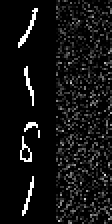

loss(X[:, rand(1:N, M)]) = 539.05286f0

┌ Info: Epoch 1
└ @ Main In[299]:5



loss(X[:, rand(1:N, M)]) = 219.38501f0
loss(X[:, rand(1:N, M)]) = 191.98476f0
loss(X[:, rand(1:N, M)]) = 177.86429f0
loss(X[:, rand(1:N, M)]) = 165.35695f0
loss(X[:, rand(1:N, M)]) = 156.36908f0
loss(X[:, rand(1:N, M)]) = 153.35672f0
loss(X[:, rand(1:N, M)]) = 149.69833f0
loss(X[:, rand(1:N, M)]) = 140.53473f0
loss(X[:, rand(1:N, M)]) = 140.67392f0
loss(X[:, rand(1:N, M)]) = 134.14368f0
loss(X[:, rand(1:N, M)]) = 127.9696f0
loss(X[:, rand(1:N, M)]) = 125.54287f0
loss(X[:, rand(1:N, M)]) = 133.29886f0
loss(X[:, rand(1:N, M)]) = 129.2687f0
loss(X[:, rand(1:N, M)]) = 121.43074f0
loss(X[:, rand(1:N, M)]) = 123.61528f0


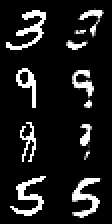

┌ Info: Epoch 2
└ @ Main In[299]:5


loss(X[:, rand(1:N, M)]) = 112.72413f0
loss(X[:, rand(1:N, M)]) = 119.67795f0
loss(X[:, rand(1:N, M)]) = 119.4982f0
loss(X[:, rand(1:N, M)]) = 114.34432f0
loss(X[:, rand(1:N, M)]) = 116.331566f0
loss(X[:, rand(1:N, M)]) = 112.42068f0
loss(X[:, rand(1:N, M)]) = 114.44931f0
loss(X[:, rand(1:N, M)]) = 108.368805f0
loss(X[:, rand(1:N, M)]) = 112.13964f0
loss(X[:, rand(1:N, M)]) = 110.26451f0
loss(X[:, rand(1:N, M)]) = 105.364265f0
loss(X[:, rand(1:N, M)]) = 106.736664f0
loss(X[:, rand(1:N, M)]) = 102.976395f0
loss(X[:, rand(1:N, M)]) = 107.813736f0
loss(X[:, rand(1:N, M)]) = 101.87459f0
loss(X[:, rand(1:N, M)]) = 97.00493f0


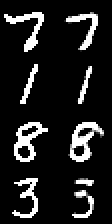

┌ Info: Epoch 3
└ @ Main In[299]:5


loss(X[:, rand(1:N, M)]) = 106.15703f0
loss(X[:, rand(1:N, M)]) = 99.552666f0
loss(X[:, rand(1:N, M)]) = 101.80361f0
loss(X[:, rand(1:N, M)]) = 101.93936f0
loss(X[:, rand(1:N, M)]) = 101.403175f0
loss(X[:, rand(1:N, M)]) = 101.59576f0
loss(X[:, rand(1:N, M)]) = 106.84853f0
loss(X[:, rand(1:N, M)]) = 100.04303f0
loss(X[:, rand(1:N, M)]) = 103.90849f0
loss(X[:, rand(1:N, M)]) = 103.114f0
loss(X[:, rand(1:N, M)]) = 104.10318f0
loss(X[:, rand(1:N, M)]) = 98.23547f0
loss(X[:, rand(1:N, M)]) = 98.64578f0
loss(X[:, rand(1:N, M)]) = 94.593056f0
loss(X[:, rand(1:N, M)]) = 102.62241f0
loss(X[:, rand(1:N, M)]) = 95.606766f0


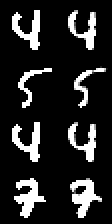

┌ Info: Epoch 4
└ @ Main In[299]:5


loss(X[:, rand(1:N, M)]) = 106.10109f0
loss(X[:, rand(1:N, M)]) = 98.32851f0
loss(X[:, rand(1:N, M)]) = 100.317696f0
loss(X[:, rand(1:N, M)]) = 100.81066f0
loss(X[:, rand(1:N, M)]) = 91.42366f0
loss(X[:, rand(1:N, M)]) = 102.19142f0
loss(X[:, rand(1:N, M)]) = 98.26031f0
loss(X[:, rand(1:N, M)]) = 98.314156f0
loss(X[:, rand(1:N, M)]) = 92.39989f0
loss(X[:, rand(1:N, M)]) = 94.33093f0
loss(X[:, rand(1:N, M)]) = 98.68315f0
loss(X[:, rand(1:N, M)]) = 95.20536f0
loss(X[:, rand(1:N, M)]) = 90.41263f0
loss(X[:, rand(1:N, M)]) = 94.38014f0
loss(X[:, rand(1:N, M)]) = 97.07199f0
loss(X[:, rand(1:N, M)]) = 97.33471f0
loss(X[:, rand(1:N, M)]) = 98.33533f0
loss(X[:, rand(1:N, M)]) = 91.747086f0


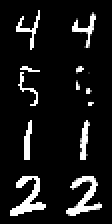

┌ Info: Epoch 5
└ @ Main In[299]:5


loss(X[:, rand(1:N, M)]) = 89.45639f0
loss(X[:, rand(1:N, M)]) = 99.462296f0
loss(X[:, rand(1:N, M)]) = 91.73972f0
loss(X[:, rand(1:N, M)]) = 96.59826f0
loss(X[:, rand(1:N, M)]) = 99.45143f0
loss(X[:, rand(1:N, M)]) = 90.455505f0
loss(X[:, rand(1:N, M)]) = 94.75161f0
loss(X[:, rand(1:N, M)]) = 92.65288f0
loss(X[:, rand(1:N, M)]) = 88.87685f0
loss(X[:, rand(1:N, M)]) = 89.06747f0
loss(X[:, rand(1:N, M)]) = 84.45729f0
loss(X[:, rand(1:N, M)]) = 89.32852f0
loss(X[:, rand(1:N, M)]) = 102.08965f0
loss(X[:, rand(1:N, M)]) = 90.96035f0
loss(X[:, rand(1:N, M)]) = 94.00141f0
loss(X[:, rand(1:N, M)]) = 97.612f0
loss(X[:, rand(1:N, M)]) = 91.26817f0


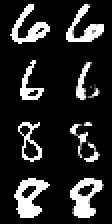

┌ Info: Epoch 6
└ @ Main In[299]:5


loss(X[:, rand(1:N, M)]) = 92.72427f0
loss(X[:, rand(1:N, M)]) = 96.07597f0
loss(X[:, rand(1:N, M)]) = 85.64627f0
loss(X[:, rand(1:N, M)]) = 99.00546f0
loss(X[:, rand(1:N, M)]) = 88.229706f0
loss(X[:, rand(1:N, M)]) = 92.60668f0
loss(X[:, rand(1:N, M)]) = 92.9034f0
loss(X[:, rand(1:N, M)]) = 97.28322f0
loss(X[:, rand(1:N, M)]) = 86.16281f0
loss(X[:, rand(1:N, M)]) = 90.746414f0
loss(X[:, rand(1:N, M)]) = 88.60723f0
loss(X[:, rand(1:N, M)]) = 94.177765f0
loss(X[:, rand(1:N, M)]) = 91.11142f0
loss(X[:, rand(1:N, M)]) = 92.895294f0
loss(X[:, rand(1:N, M)]) = 89.4939f0
loss(X[:, rand(1:N, M)]) = 92.33192f0
loss(X[:, rand(1:N, M)]) = 93.9017f0
loss(X[:, rand(1:N, M)]) = 89.56361f0


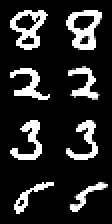

loss(X[:, rand(1:N, M)]) = 94.80353f0


┌ Info: Epoch 7
└ @ Main In[299]:5


loss(X[:, rand(1:N, M)]) = 89.105545f0
loss(X[:, rand(1:N, M)]) = 93.51913f0
loss(X[:, rand(1:N, M)]) = 92.48166f0
loss(X[:, rand(1:N, M)]) = 92.12585f0
loss(X[:, rand(1:N, M)]) = 94.85611f0
loss(X[:, rand(1:N, M)]) = 90.64441f0
loss(X[:, rand(1:N, M)]) = 89.39337f0
loss(X[:, rand(1:N, M)]) = 97.885025f0
loss(X[:, rand(1:N, M)]) = 88.19505f0
loss(X[:, rand(1:N, M)]) = 97.28409f0
loss(X[:, rand(1:N, M)]) = 100.07101f0
loss(X[:, rand(1:N, M)]) = 87.44786f0
loss(X[:, rand(1:N, M)]) = 94.37741f0
loss(X[:, rand(1:N, M)]) = 88.553345f0
loss(X[:, rand(1:N, M)]) = 86.370804f0
loss(X[:, rand(1:N, M)]) = 91.153015f0
loss(X[:, rand(1:N, M)]) = 88.51842f0
loss(X[:, rand(1:N, M)]) = 89.65671f0
loss(X[:, rand(1:N, M)]) = 87.86182f0


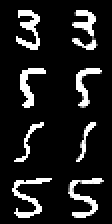

┌ Info: Epoch 8
└ @ Main In[299]:5


loss(X[:, rand(1:N, M)]) = 82.2716f0
loss(X[:, rand(1:N, M)]) = 92.84364f0
loss(X[:, rand(1:N, M)]) = 94.691154f0
loss(X[:, rand(1:N, M)]) = 90.76431f0
loss(X[:, rand(1:N, M)]) = 93.14792f0
loss(X[:, rand(1:N, M)]) = 92.68551f0
loss(X[:, rand(1:N, M)]) = 89.81436f0
loss(X[:, rand(1:N, M)]) = 89.83002f0
loss(X[:, rand(1:N, M)]) = 90.36797f0
loss(X[:, rand(1:N, M)]) = 91.085495f0
loss(X[:, rand(1:N, M)]) = 90.92804f0
loss(X[:, rand(1:N, M)]) = 90.73305f0
loss(X[:, rand(1:N, M)]) = 86.25994f0
loss(X[:, rand(1:N, M)]) = 83.92308f0
loss(X[:, rand(1:N, M)]) = 87.27599f0
loss(X[:, rand(1:N, M)]) = 91.15948f0
loss(X[:, rand(1:N, M)]) = 88.348434f0
loss(X[:, rand(1:N, M)]) = 89.85251f0
loss(X[:, rand(1:N, M)]) = 87.15051f0
loss(X[:, rand(1:N, M)]) = 91.35745f0
loss(X[:, rand(1:N, M)]) = 88.13275f0
loss(X[:, rand(1:N, M)]) = 85.099625f0
loss(X[:, rand(1:N, M)]) = 85.93244f0
loss(X[:, rand(1:N, M)]) = 89.14586f0


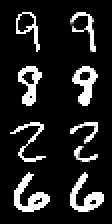

┌ Info: Epoch 9
└ @ Main In[299]:5


loss(X[:, rand(1:N, M)]) = 93.93344f0
loss(X[:, rand(1:N, M)]) = 91.92392f0
loss(X[:, rand(1:N, M)]) = 88.655014f0
loss(X[:, rand(1:N, M)]) = 91.99945f0
loss(X[:, rand(1:N, M)]) = 93.03233f0
loss(X[:, rand(1:N, M)]) = 90.73686f0
loss(X[:, rand(1:N, M)]) = 90.74134f0
loss(X[:, rand(1:N, M)]) = 90.05851f0
loss(X[:, rand(1:N, M)]) = 92.25502f0
loss(X[:, rand(1:N, M)]) = 87.29089f0
loss(X[:, rand(1:N, M)]) = 90.01427f0
loss(X[:, rand(1:N, M)]) = 91.05049f0
loss(X[:, rand(1:N, M)]) = 87.94467f0
loss(X[:, rand(1:N, M)]) = 88.22411f0
loss(X[:, rand(1:N, M)]) = 90.50237f0
loss(X[:, rand(1:N, M)]) = 87.51999f0
loss(X[:, rand(1:N, M)]) = 86.14275f0
loss(X[:, rand(1:N, M)]) = 89.38753f0
loss(X[:, rand(1:N, M)]) = 81.54686f0


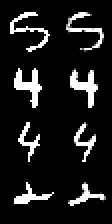

┌ Info: Epoch 10
└ @ Main In[299]:5


loss(X[:, rand(1:N, M)]) = 91.233826f0
loss(X[:, rand(1:N, M)]) = 88.030716f0
loss(X[:, rand(1:N, M)]) = 86.39037f0
loss(X[:, rand(1:N, M)]) = 92.33772f0
loss(X[:, rand(1:N, M)]) = 88.26506f0
loss(X[:, rand(1:N, M)]) = 82.68229f0
loss(X[:, rand(1:N, M)]) = 86.059906f0
loss(X[:, rand(1:N, M)]) = 86.85194f0
loss(X[:, rand(1:N, M)]) = 94.12906f0
loss(X[:, rand(1:N, M)]) = 89.1555f0
loss(X[:, rand(1:N, M)]) = 81.86654f0
loss(X[:, rand(1:N, M)]) = 88.221634f0
loss(X[:, rand(1:N, M)]) = 94.009605f0
loss(X[:, rand(1:N, M)]) = 87.22277f0
loss(X[:, rand(1:N, M)]) = 86.67049f0
loss(X[:, rand(1:N, M)]) = 90.97505f0
loss(X[:, rand(1:N, M)]) = 92.822464f0
loss(X[:, rand(1:N, M)]) = 90.363556f0


In [299]:
## @info("Beginning training loop...")
best_ls = Inf
last_improvement = 0
for epoch = 1:10
    @info "Epoch $epoch"
    display(sample())
    global best_ls, last_improvement
    Flux.train!(loss, ps, zip(data), opt, cb=evalcb)
    ls = loss(data[1])
    if ls <= best_ls
        BSON.@save "vae.bson" encoder μ logσ decoder
        best_ls = ls
        last_improvement = epoch
    end
    if epoch - last_improvement >= 2
        @warn(" -> We're calling this converged.")
        break
    end
end

In [38]:
BSON.@load "vae.bson" encoder μ logσ decoder 

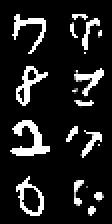

In [41]:
sample()

Do budowania modeli generatywnych możemy wykorzystać też sieci konwolucyjne:

In [71]:
Dz, Dh = 8, 128 #wymiary

(8, 128)

In [72]:
encoder =  Chain(x -> reshape(x, (28,28,1,size(x)[end])),
        Conv((3,3), 1=>32, pad = (1,1),relu),
        Conv((3,3), 32=>32, pad = (1,1), relu),
        MaxPool((2, 2)),
        Dropout(0.25),
        x -> reshape(x, :, size(x, 4)),
        Dense(6272, Dh))

μ = Dense(Dh, Dz) 

logσ = Dense(Dh, Dz)

z(μ, logσ) = μ + exp.(logσ) .* randn(Float32,size(logσ))

decoder = Chain(Dense(Dz, Dh, relu),
        Dense(Dh,6272, relu),
        x -> reshape(x,(14,14,32,size(x)[end])),
        Dropout(0.25),
        x -> repeat(x, inner = [2,2,1,1]),
        ConvTranspose((3,3), 32=>32, pad = (1,1),relu),
        ConvTranspose((3,3), 32=>1, pad = (1,1)),
        x -> reshape(x, :, size(x, 4))
       )

Chain(Dense(8, 128, relu), Dense(128, 6272, relu), #67, Dropout(0.25), #68, ConvTranspose((3, 3), 32=>32, relu), ConvTranspose((3, 3), 32=>1), #69)

In [73]:
evalcb = throttle(() -> @show(loss(X[:, rand(1:N, M)])), 100)
opt = ADAM()
ps = params(encoder, μ, logσ, decoder);

┌ Info: Beginning training loop...
└ @ Main In[339]:1
┌ Info: Epoch 1
└ @ Main In[339]:5


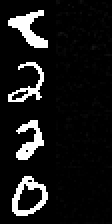

loss(X[:, rand(1:N, M)]) = 526.2518f0
loss(X[:, rand(1:N, M)]) = 225.25146f0
loss(X[:, rand(1:N, M)]) = 204.9599f0
loss(X[:, rand(1:N, M)]) = 195.9152f0
loss(X[:, rand(1:N, M)]) = 189.1603f0
loss(X[:, rand(1:N, M)]) = 190.08385f0
loss(X[:, rand(1:N, M)]) = 170.69234f0
loss(X[:, rand(1:N, M)]) = 154.51494f0
loss(X[:, rand(1:N, M)]) = 137.1485f0
loss(X[:, rand(1:N, M)]) = 145.92685f0
loss(X[:, rand(1:N, M)]) = 149.05913f0
loss(X[:, rand(1:N, M)]) = 143.48878f0
loss(X[:, rand(1:N, M)]) = 134.92357f0
loss(X[:, rand(1:N, M)]) = 141.97293f0
loss(X[:, rand(1:N, M)]) = 134.6739f0
loss(X[:, rand(1:N, M)]) = 138.57439f0
loss(X[:, rand(1:N, M)]) = 125.15632f0
loss(X[:, rand(1:N, M)]) = 130.27333f0
loss(X[:, rand(1:N, M)]) = 125.773155f0
loss(X[:, rand(1:N, M)]) = 126.06448f0
loss(X[:, rand(1:N, M)]) = 121.80974f0
loss(X[:, rand(1:N, M)]) = 124.31027f0
loss(X[:, rand(1:N, M)]) = 114.32431f0
loss(X[:, rand(1:N, M)]) = 120.50585f0
loss(X[:, rand(1:N, M)]) = 118.74943f0
loss(X[:, rand(1:N, M)]) = 118

┌ Info: Epoch 2
└ @ Main In[339]:5


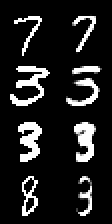

loss(X[:, rand(1:N, M)]) = 97.962074f0
loss(X[:, rand(1:N, M)]) = 112.928894f0
loss(X[:, rand(1:N, M)]) = 107.45342f0
loss(X[:, rand(1:N, M)]) = 115.3323f0
loss(X[:, rand(1:N, M)]) = 113.25692f0
loss(X[:, rand(1:N, M)]) = 111.44995f0
loss(X[:, rand(1:N, M)]) = 101.246445f0
loss(X[:, rand(1:N, M)]) = 109.74864f0
loss(X[:, rand(1:N, M)]) = 106.35928f0
loss(X[:, rand(1:N, M)]) = 107.34067f0
loss(X[:, rand(1:N, M)]) = 107.72529f0
loss(X[:, rand(1:N, M)]) = 110.9267f0
loss(X[:, rand(1:N, M)]) = 115.31012f0
loss(X[:, rand(1:N, M)]) = 113.07262f0
loss(X[:, rand(1:N, M)]) = 103.52973f0
loss(X[:, rand(1:N, M)]) = 108.52609f0
loss(X[:, rand(1:N, M)]) = 107.86378f0
loss(X[:, rand(1:N, M)]) = 101.81335f0
loss(X[:, rand(1:N, M)]) = 106.773315f0
loss(X[:, rand(1:N, M)]) = 116.93386f0
loss(X[:, rand(1:N, M)]) = 105.93786f0
loss(X[:, rand(1:N, M)]) = 105.75604f0
loss(X[:, rand(1:N, M)]) = 112.874825f0
loss(X[:, rand(1:N, M)]) = 109.54202f0
loss(X[:, rand(1:N, M)]) = 107.54645f0
loss(X[:, rand(1:N, M)]

┌ Info: Epoch 3
└ @ Main In[339]:5


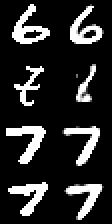

loss(X[:, rand(1:N, M)]) = 109.7922f0
loss(X[:, rand(1:N, M)]) = 107.30313f0
loss(X[:, rand(1:N, M)]) = 104.11278f0
loss(X[:, rand(1:N, M)]) = 108.47595f0
loss(X[:, rand(1:N, M)]) = 102.22855f0
loss(X[:, rand(1:N, M)]) = 101.97189f0
loss(X[:, rand(1:N, M)]) = 102.61557f0
loss(X[:, rand(1:N, M)]) = 108.10775f0
loss(X[:, rand(1:N, M)]) = 97.05548f0
loss(X[:, rand(1:N, M)]) = 103.6622f0
loss(X[:, rand(1:N, M)]) = 109.452774f0
loss(X[:, rand(1:N, M)]) = 107.22462f0
loss(X[:, rand(1:N, M)]) = 105.70578f0
loss(X[:, rand(1:N, M)]) = 105.96082f0
loss(X[:, rand(1:N, M)]) = 107.95917f0
loss(X[:, rand(1:N, M)]) = 96.70735f0
loss(X[:, rand(1:N, M)]) = 98.91366f0
loss(X[:, rand(1:N, M)]) = 106.21475f0
loss(X[:, rand(1:N, M)]) = 95.94792f0
loss(X[:, rand(1:N, M)]) = 107.469795f0
loss(X[:, rand(1:N, M)]) = 102.77667f0
loss(X[:, rand(1:N, M)]) = 104.953674f0
loss(X[:, rand(1:N, M)]) = 101.904175f0
loss(X[:, rand(1:N, M)]) = 104.835175f0
loss(X[:, rand(1:N, M)]) = 100.56792f0
loss(X[:, rand(1:N, M)]) =

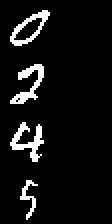

┌ Info: Epoch 4
└ @ Main In[339]:5


loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, rand(1:N, M)]) = NaN32
loss(X[:, 

┌ Warning:  -> We're calling this converged.
└ @ Main In[339]:16


In [339]:
@info("Beginning training loop...")
best_ls = Inf
last_improvement = 0
for epoch = 1:10
    @info "Epoch $epoch"
    display(sample())
    global best_ls, last_improvement
    Flux.train!(loss, ps, zip(data), opt, cb=evalcb)
    ls = loss(data[1])
    if ls <= best_ls
        BSON.@save "vaeCNN_MNIST.bson" encoder μ logσ decoder
        best_ls = ls
        last_improvement = epoch
    end
    if epoch - last_improvement >= 2
        @warn(" -> We're calling this converged.")
        break
    end
end

In [75]:
BSON.@load "vaeCNN_MNIST.bson" encoder μ logσ decoder 

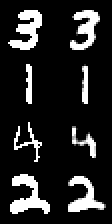

In [76]:
sample()

In [70]:
loss(data[1])

103.318825f0

## Dodatkowa praca domowa

Na podstawie prezentowanego na zajęciach przykładu wyucz wariacyjny autoenkoder w taki sposób żeby reprezentował dane za pomocą wektora dwóch zmiennych ukrytych z możliwie najwyższą dokładnością. Następnie:
1. Przedstaw na wykresie otrzymany wynik. Jak zachowują się zmienne ukryte?
2. Wyucz sieć o takiej samej architekturze korzystając jedynie z warunkowego prawdopodobieństwa $logp(x|z)$ jako funkcji straty. Czym różni się otrzymany wynik? 
3. Wyucz taką samą sieć korzystając jedynie z Dywergencji Kullbacka-Leiblera jako funkcji straty. Ponownie porównaj wynik z poprzednio otrzymanymi.